In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [56]:
data = pd.read_csv("customer_churn_train.csv")

In [57]:
data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [58]:
data.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [59]:
data.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [60]:
data = data.dropna()

In [61]:
data.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440832 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 43.7+ MB


In [63]:
col = ['Gender','Subscription Type','Contract Length']
for i in col:
  unique_values = data[i].unique()
  print(f"Unique values for {i}:")
  for j in unique_values:
    print(j)
  print('-'*50)

Unique values for Gender:
Female
Male
--------------------------------------------------
Unique values for Subscription Type:
Standard
Basic
Premium
--------------------------------------------------
Unique values for Contract Length:
Annual
Monthly
Quarterly
--------------------------------------------------


In [64]:
data.replace({'Gender':{'Female':0,'Male':1},'Subscription Type':{'Standard':0,'Basic':1,'Premium':2},
              'Contract Length':{'Annual':0,'Monthly':1,'Quarterly':2}},inplace=True)

In [65]:
data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,0,39.0,14.0,5.0,18.0,0,0,932.0,17.0,1.0
1,3.0,65.0,0,49.0,1.0,10.0,8.0,1,1,557.0,6.0,1.0
2,4.0,55.0,0,14.0,4.0,6.0,18.0,1,2,185.0,3.0,1.0
3,5.0,58.0,1,38.0,21.0,7.0,7.0,0,1,396.0,29.0,1.0
4,6.0,23.0,1,32.0,20.0,5.0,8.0,1,1,617.0,20.0,1.0


<Axes: >

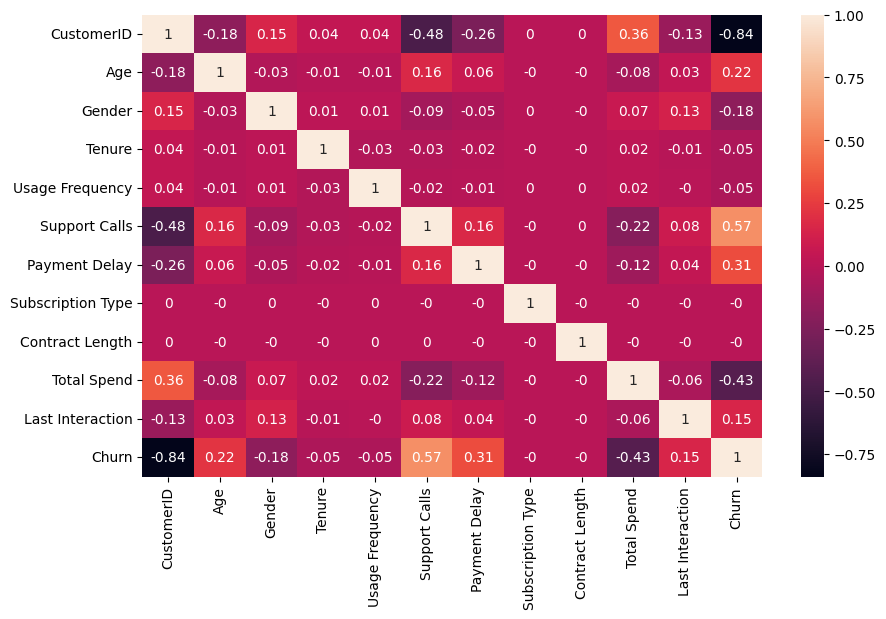

In [66]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr().round(2),annot=True)

<Axes: xlabel='Gender', ylabel='count'>

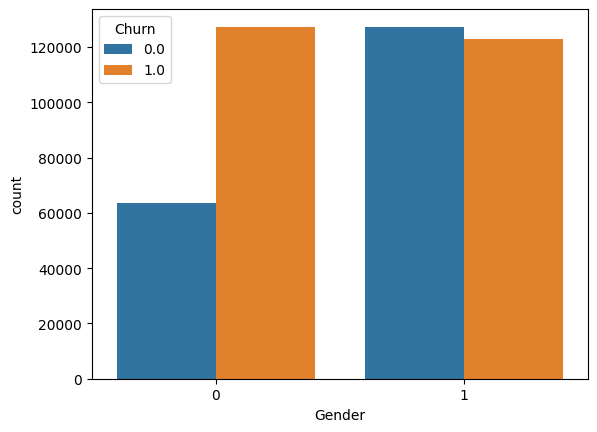

In [67]:
sns.countplot(x='Gender',hue='Churn',data=data)

(array([190833.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 249999.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

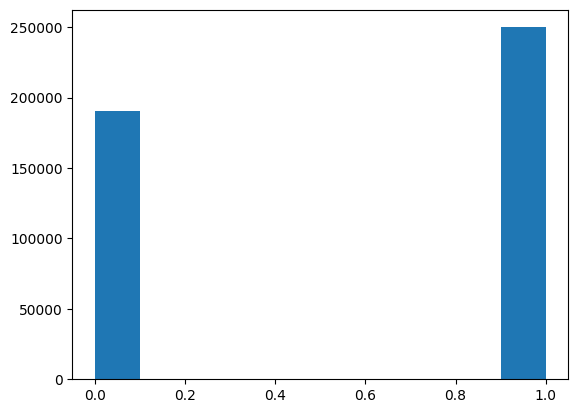

In [68]:
plt.hist(x='Churn',data=data)

In [69]:
x=data.drop(columns=['CustomerID','Churn'],axis=1)
y=data['Churn']

In [70]:
x

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
0,30.0,0,39.0,14.0,5.0,18.0,0,0,932.00,17.0
1,65.0,0,49.0,1.0,10.0,8.0,1,1,557.00,6.0
2,55.0,0,14.0,4.0,6.0,18.0,1,2,185.00,3.0
3,58.0,1,38.0,21.0,7.0,7.0,0,1,396.00,29.0
4,23.0,1,32.0,20.0,5.0,8.0,1,1,617.00,20.0
...,...,...,...,...,...,...,...,...,...,...
440828,42.0,1,54.0,15.0,1.0,3.0,2,0,716.38,8.0
440829,25.0,0,8.0,13.0,1.0,20.0,2,0,745.38,2.0
440830,26.0,1,35.0,27.0,1.0,5.0,0,2,977.31,9.0
440831,28.0,1,55.0,14.0,2.0,0.0,0,2,602.55,2.0


In [71]:
y

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
440828    0.0
440829    0.0
440830    0.0
440831    0.0
440832    0.0
Name: Churn, Length: 440832, dtype: float64

In [72]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=0)
random_forest=rf.fit(X_train, y_train)
r1 = rf.score(X_train, y_train)*100
r2 = rf.score(X_test, y_test)*100
print("R² of Random Forest Regressor on training set: {:.3f}".format(r1))
print("R² of Random Forest Regressor on test set: {:.3f}".format(r2))


R² of Random Forest Regressor on training set: 99.982
R² of Random Forest Regressor on test set: 99.897


In [73]:
from sklearn.ensemble import GradientBoostingRegressor
gb1 = GradientBoostingRegressor(random_state=0, max_depth=4)
gradient=gb1.fit(X_train, y_train)
g3 = gb1.score(X_train, y_train)*100
g4 = gb1.score(X_test, y_test)*100
print("R² of Gradient Boosting Regressor on training set: {:.3f}".format(g3))
print("R² of Gradient Boosting Regressor on test set: {:.3f}".format(g4))

R² of Gradient Boosting Regressor on training set: 94.946
R² of Gradient Boosting Regressor on test set: 94.852


In [74]:
models = ['Random Forest Regressor','Gradient Boosting Regressor']
tests_score = [r2, g4]
compare_models = pd.DataFrame({ "Algorithms": models, "Tests Score": tests_score })
compare_models.sort_values(by = "Tests Score", ascending = False)

,Algorithms,Tests Score
0,Random Forest Regressor,99.897401
1,Gradient Boosting Regressor,94.851904


<Axes: xlabel='Tests Score', ylabel='Algorithms'>

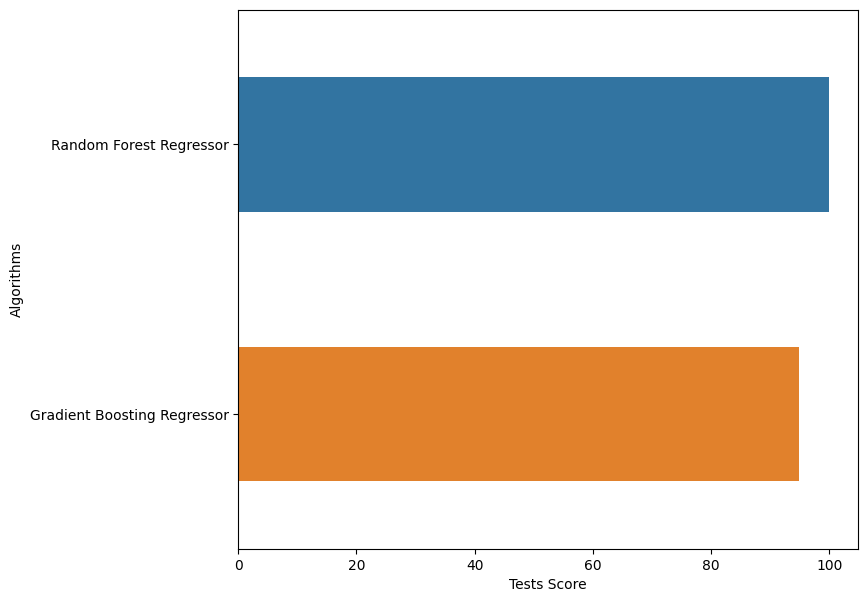

In [75]:
plt.figure(figsize=(8,7))
sns.barplot(x = "Tests Score", y = "Algorithms", data = compare_models,width=0.5)

In [92]:
input_data = (22,0,25,14,4,27,1,1,598,9)
id_asnumpy = np.asarray(input_data)
input_reshaped = id_asnumpy.reshape(1,-1)
predict = random_forest.predict(input_reshaped)
value = int(predict)
if (value == 0):
  print("Not churn")
else:
  print("Churn")

Churn


In [77]:
tdata = pd.read_csv("customer_churn_test.csv")

In [78]:
tdata.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [79]:
tdata.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [80]:
tdata.replace({'Gender':{'Female':0,'Male':1},'Subscription Type':{'Standard':0,'Basic':1,'Premium':2},
              'Contract Length':{'Annual':0,'Monthly':1,'Quarterly':2}},inplace=True)

In [81]:
test_data = tdata.drop(['CustomerID','Churn'],axis=1)

In [82]:
submission = random_forest.predict(test_data)

In [83]:
test_ids = tdata["CustomerID"]
df=pd.DataFrame({"CustomerID":test_ids.values,"Churn":submission})
df

,CustomerID,Churn
0,1,1.0
1,2,1.0
2,3,1.0
3,4,1.0
4,5,1.0
...,...,...
64369,64370,1.0
64370,64371,1.0
64371,64372,1.0
64372,64373,1.0


In [84]:
df.to_csv("Submission.csv",index=False)